In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df= pd.read_csv("/content/titanic.csv")
display(titanic_data.head())


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1300,3.0,1.0,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1.0,0.0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5,0.0,0.0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(1310, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [ ]:
df['sex'].unique()

array(['female', 'male', nan], dtype=object)

In [ ]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [ ]:
df = df.dropna()

<Axes: xlabel='sex', ylabel='count'>

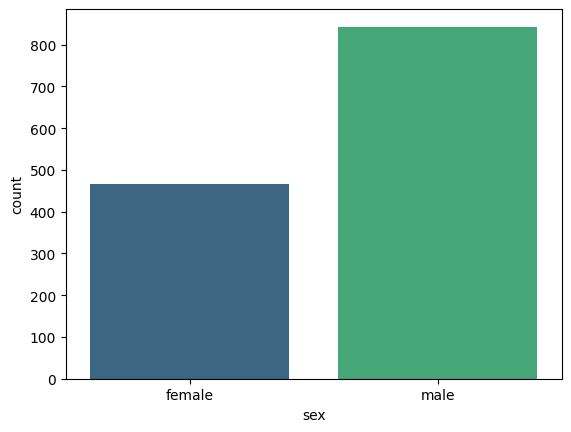

In [ ]:
sns.countplot(x='sex', data=df, palette='viridis')

In [ ]:
X = df[['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']]
y = df['sex']

In [ ]:
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

In [ ]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
y_pred = model.predict(X_test_imputed)

In [ ]:
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.0


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7442748091603053
Confusion Matrix:
[[ 59  36]
 [ 31 136]]
Classification Report:
              precision    recall  f1-score   support

      female       0.66      0.62      0.64        95
        male       0.79      0.81      0.80       167

    accuracy                           0.74       262
   macro avg       0.72      0.72      0.72       262
weighted avg       0.74      0.74      0.74       262



In [ ]:
X_age = titanic_data[['pclass', 'sex', 'sibsp', 'parch', 'age']]
y_age = titanic_data['fare']

In [ ]:
X_age = pd.get_dummies(X_age, columns=['sex'], drop_first=True)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_age_imputed = pd.DataFrame(imputer.fit_transform(X_age), columns=X_age.columns)

In [ ]:
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age_imputed, y_age, test_size=0.2, random_state=42)

In [ ]:
imputer = SimpleImputer(strategy='mean')
y_train_age_imputed = imputer.fit_transform(y_train_age.values.reshape(-1, 1))

In [ ]:
model_age = LinearRegression()
model_age.fit(X_train_age, y_train_age_imputed)

LinearRegression()

In [ ]:
y_pred_age = model_age.predict(X_test_age)

In [ ]:
mse = mean_squared_error(y_test_age, y_pred_age)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1659.6231573300054


In [ ]:
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

    Feature  Importance
1  survived    0.295104
4     parch    0.293643
5      fare    0.266611
3     sibsp    0.055994
2       age    0.047821
0    pclass    0.040826
